## Introduction

From the dataset [Food Deserts in the USA](https://www.kaggle.com/tcrammond/food-access-and-food-deserts?select=food_access_research_atlas.csv) dataset on Kaggles: "the USDA defines living in a food desert as:

living more than one mile from a supermarket in urban/suburban areas, and more than 10 miles from a supermarket in rural areas"

## Goal


Our classification problem will identify if a county is a food desert or not. We will predict this using demographic information, academic performance, income etc. To test our results, we will use labels that contain flags to indicate if a county is a food desert.

In [76]:
import pandas as pd
# pd.set_option('display.max_colwidth', 0) #text reflow in columns

## Dataset

In [77]:
combined_df = pd.read_csv("../data/combined_data.csv")
combined_df.head()

,Educ_countyid,Educ_fips,Educ_gap_est,Educ_tot_asmts,Educ_cellcount,Educ_mn_asmts,Educ_mn_avg_ol,Educ_mn_grd_ol,Educ_mn_coh_ol,Educ_mn_mth_ol,...,Food_TractBlack,Food_TractAsian,Food_TractNHOPI,Food_TractAIAN,Food_TractOMultir,Food_TractHispanic,Food_TractHUNV,Food_TractSNAP,County,State
0,1001,1.0,0.0,72864.0,96.0,759.000000,5.636815,1.048619,-0.092830,-0.435624,...,803.583333,39.500000,2.666667,19.333333,111.250000,109.166667,90.083333,223.500000,Autauga,AL
1,1003,1.0,0.0,213214.0,96.0,2220.979167,5.428993,0.832481,-0.051916,-0.611446,...,551.774194,43.483871,2.870968,39.225806,204.967742,257.806452,72.322581,208.741935,Baldwin,AL
2,1005,1.0,0.0,26521.0,96.0,276.260417,3.692509,0.956793,0.129474,-0.743482,...,1430.555556,11.888889,3.222222,12.666667,128.000000,154.111111,89.111111,233.000000,Barbour,AL
3,1007,1.0,0.0,25678.0,96.0,267.479167,4.235791,0.996612,0.021188,-0.888118,...,1261.750000,5.500000,3.250000,16.000000,97.000000,101.500000,74.750000,281.250000,Bibb,AL
4,1009,1.0,0.0,71940.0,96.0,749.375000,4.689641,0.866955,0.091370,-1.011810,...,84.555556,13.000000,4.222222,34.111111,336.777778,514.000000,91.444444,322.222222,Blount,AL


## Identifying labels

There are lots of columns in our dataset. Let's find the ones that we will use as labels:

In [78]:
food_doc = pd.read_csv("../data/food_access_variable_lookup.csv")

In [79]:
desert_flags_labels = food_doc[food_doc['Description'].str.contains('food desert')]
desert_flags_labels

,Field,LongName,Description
9,LILATracts_1And10,Low income and low access tract measured at 1 mile for urban areas and 10 miles for rural areas,Flag for food desert when considering low accessibilty at 1 and 10 miles
10,LILATracts_halfAnd10,Low income and low access tract measured at 1/2 mile for urban areas and 10 miles for rural areas,Flag for food desert when considering low accessibilty at 1/2 and 10 miles
11,LILATracts_1And20,Low income and low access tract measured at 1 mile for urban areas and 20 miles for rural areas,Flag for food desert when considering low accessibilty at 1 and 20 miles
12,LILATracts_Vehicle,Low income and low access tract using vehicle access or low income and low access tract measured at 20 miles,Flag for food desert when considering vehicle access or at 20 miles


In [ ]:
We ide

In [80]:
desert_flags_label_list = desert_flags_labels['Field'].tolist()
desert_flags_label_list = list(map(lambda label: 'Food_' + label, desert_flags_label_list) )
print(desert_flags_label_list)

['Food_LILATracts_1And10', 'Food_LILATracts_halfAnd10', 'Food_LILATracts_1And20', 'Food_LILATracts_Vehicle']


### Average of Boolean
From 0-Data_Exploration_And_Cleaning.ipynb : For boolean type variables, the resulting average will represent a percentage (in decimal form) of how many tracts in that county had a value of 1 before combining.

In [81]:
desert_flags = combined_df[desert_flags_label_list]
desert_flags.head()

,Food_LILATracts_1And10,Food_LILATracts_halfAnd10,Food_LILATracts_1And20,Food_LILATracts_Vehicle
0,0.166667,0.166667,0.083333,0.166667
1,0.096774,0.096774,0.096774,0.064516
2,0.333333,0.333333,0.111111,0.222222
3,0.000000,0.000000,0.000000,0.250000
4,0.000000,0.000000,0.000000,0.222222


### Indicators of Food Access
From the documentation, we know the following:
- Accessibility to sources of healthy food, as measured by distance to a store or by the number of stores in an area.
- Individual-level resources that may affect accessibility, such as family income or vehicle availability.
- Neighborhood-level indicators of resources, such as the average income of the neighborhood and the availability of public transportation.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fb891f0>,
      dtype=object)

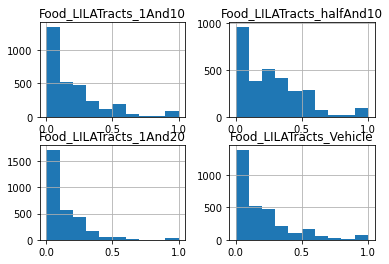

In [82]:
desert_flags.hist()